<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Роман!</b>
    
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

# Определение стоимости автомобилей

Cервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 

**Цель исследования:**

Построим модель, которая умеет определять рыночную стоимость автомобиля. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

**Описание данных:**

Набор данных находится в файле `/datasets/autos.csv`. О качестве данных ничего не известно.

Признаки:
* `DateCrawled` — дата скачивания анкеты из базы
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `Repaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя
    
Целевой признак:
* `Price` — цена (евро)

**Ход исследования:** 

	Загрузим данные, путь к файлу:  /datasets/autos.csv.
	Изучим данные. Заполним пропущенные значения и обработаем аномалии в столбцах. Если среди признаков имеются неинформативные, удалим их.
	Подготовим выборки для обучения моделей.
	Обучим разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуем разные гиперпараметры.
	Проанализируем время обучения, время предсказания и качество моделей.
	Опираясь на критерии заказчика, выберем лучшую модель, проверим её качество на тестовой выборке.

Таким образом, исследование пройдёт несколько этапов:
 1. Загрузка и подготовка данных.
 2. Обучение моделей.
 3. Анализ моделей.
 4. Общий вывод.
 
**Примечания:**

	Для оценки качества моделей применяйте метрику RMSE.
	Значение метрики RMSE должно быть меньше 2500.
	Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
	Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
	Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
	Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del.
    
    Чтобы усилить исследование, не будем ограничиваться градиентным бустингом. Попробуем более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг. 
*Поэкспериментируем и сравним характеристики моделей: время обучения, время предсказания, точность результата.*

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть вступительный комментарий

## Подготовка данных

In [1]:
"!pip install lightgbm"

'!pip install lightgbm'

In [2]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

from scipy.stats import spearmanr

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

warnings.filterwarnings("ignore")

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в одном месте в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

Константа:

In [3]:
RANDOM_STATE = 12345

In [4]:
try:
    df = pd.read_csv('/Users/roman/Desktop/Data Scientist/Practicum/Projects/2_numerical_methods/autos.csv',
                parse_dates=[0, 12, 15])
except:
    print('что-то пошло не так')

try:
    df = pd.read_csv('/datasets/autos.csv',
                     parse_dates=[0, 12, 15])
except:
    print('что-то пошло не так')

что-то пошло не так


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для загрузки данных можно использовать библиотеку os или констукцию try/except. Это поможет работать с проектом как локально, так и через Jupyter Hub, не внося дополнительных правок.

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

In [6]:
df.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


Приведем название столбцов к единому_регистру:

In [7]:
df.columns = df.columns.str.lower()

df = df.rename(columns={'datecrawled':'date_crawled', 
                        'vehicletype':'vehicle_type', 
                        'registrationyear':'registration_year', 
                        'registrationmonth':'registration_month', 
                        'fueltype':'fuel_type', 
                        'notrepaired':'not_repaired', 
                        'datecreated':'date_created',
                        'numberofpictures': 'number_of_pictures',
                        'postalcode':'postal_code',
                        'lastseen':'last_seen'})

df.head(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


In [8]:
df.head(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


Удалим аномалию, когда дата регистрации авто превышает дату создания объявления:

In [9]:
df = df.query("registration_year < date_crawled.dt.year")

Удалим лишние признаки:

In [10]:
df = df.drop(['number_of_pictures',
                'postal_code',
                'date_created',
                'last_seen',
                'registration_month',
                'date_crawled'], axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что удаляешь неинформативные признаки.

Проверим на дубликаты:

In [11]:
df.duplicated().sum()

43510

In [12]:
df = df.drop_duplicates().reset_index(drop=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

Посмотрим выбросы в столбцах:

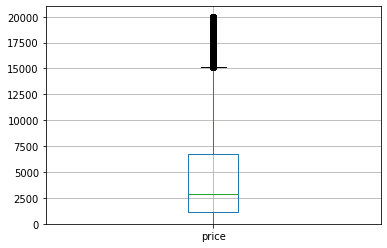

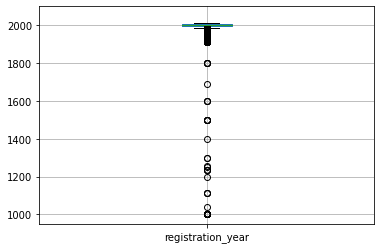

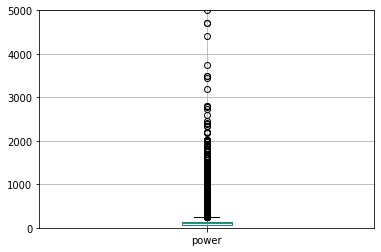

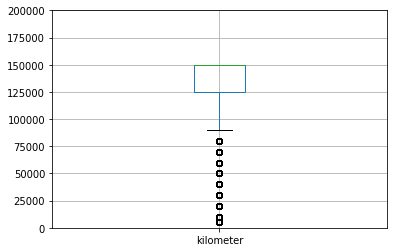

In [13]:
plt.ylim(0, 21000)
df.boxplot(column=['price'])
plt.show()

plt.ylim(950, 2100)
df.boxplot(column=['registration_year'])
plt.show()

plt.ylim(0, 5000)
df.boxplot(column=['power'])
plt.show()

plt.ylim(0, 200_000)
df.boxplot(column=['kilometer'])
plt.show()

**Вывод:**

* в столбце `registrationyear` были обнаружены объявления из будущего и автомобили загрестированные до 1768 года (дата создания первого автомобиля) - избавимся от них.
* столбец `numberofpictures` содержит одно нулевое значение и неинформативен - удалим его.
* есть объявления с л.с. `Power` равным 0. Наиболее вероятно, что речь идёт об электротранспорте. Спецтехника может иметь около 2000 л.с., удалим из выборки выбросы более 2000 л.с.

In [14]:
df = df.query("2001 > power")
df.reset_index(drop=True, inplace=True)

In [15]:
df = df.query("2024 > registration_year > 1768")
df.reset_index(drop=True, inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что обрабатываешь аномалии.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь стоит обратить внимание на даты, которые есть в датасете, чтобы выбрать верхнюю границу года регистрации. Год регистрации автомобиля не может быть больше даты создания объявления, например.

In [16]:
df = df.query("2020 > registration_year > 1768")
df.reset_index(drop=True, inplace=True)

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Исправил выше, до удаления лишних столбцов
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [17]:
print('Минимальный год регистрации авто:', df['registration_year'].min())
print('Максимальный год регистрации авто:', df['registration_year'].max())

Минимальный год регистрации авто: 1800
Максимальный год регистрации авто: 2015


In [18]:
df['registration_year'].sort_values()

166982    1800
284585    1800
184571    1800
31211     1800
52994     1910
          ... 
88579     2015
223363    2015
49059     2015
158031    2015
150591    2015
Name: registration_year, Length: 286571, dtype: int64

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Кроме того много значений с нулевой ценой, стоит их также обработать, так как это может влиять на ответ модели.

Удалим аномалии с нулевой и крайне низкой ценой:

In [19]:
df = df.query('price > 50')

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

Посмотрим процент пропусков в столбцах:

In [20]:
pd.DataFrame(df.isna().mean().round(
             4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
repaired,17.980000
fuel_type,6.880000
model,4.820000
gearbox,4.300000
vehicle_type,3.520000
brand,0.000000
kilometer,0.000000
power,0.000000
registration_year,0.000000
price,0.000000


**Вывод:** 
* множество пропусков данных в столце `repaired`. В качестве решения можем заполнить часть пропусков, учитывая пробег и возраст автомобиля. Наиболее вероятно, что автомобиль с пробегом более 100_000 км или возрастом более 10 лет хотя раз был в ремонте. И наоборот автомобиль с пробегом до 10_000 км и возрастом до 1 года, наиболее вероятно не ремонтировался. В рамкой данной задачи упростим ситуацию и заменим пропуски на "unknown".

* пропуски в модели `model` cоставляют 5.9%. Для их восплонения нужно обратиться к заказчику. Удалим их.

* пропуски в типе коробке `gearbox` - 5.5%, типе автомобильного кузова `vehicle_type` cоставляют около 11.1%, в типе топлива `fuel_type` - 9.9%. Данные параметры c большой вероятностью одинаковы в одинаковых моделях автомобилей. Заполним пропуски в данных признаках наиболее частым значением той же модели.

<div class="alert alert-info">
<h1> Комментарий студента</h1>

Привет! спасибо за проверку.
    
    1. Насколько эффективно в 1-ом пункте вывода обучить машину, чтобы она сама заполнила пропуски на основне всех признаков?
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Привет! Да, такой вариант есть. Можно сделать таким образом. Можно заполнить пропуски заглушкой типа unknown, это тоже приемлемо.

In [21]:
df['repaired'].fillna('unknown', inplace=True)

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Исправил
</div>

In [22]:
df.dropna(subset=['model'], inplace=True)
df.reset_index(drop=True)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
2,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
4,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
263872,3999,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
263873,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
263874,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
263875,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


Заполним пропуски в признаках `gearbox`, `vehicle_type`, `fuel_type` наиболее частым значением той же модели:

In [23]:
for sing in ['vehicle_type', 'gearbox', 'fuel_type']:
    df[sing] = df[sing].fillna(df
                                .groupby('model')['vehicle_type']
                                .transform(lambda x: x.value_counts().idxmax())
                                        )

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263877 entries, 0 to 286570
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              263877 non-null  int64 
 1   vehicle_type       263877 non-null  object
 2   registration_year  263877 non-null  int64 
 3   gearbox            263877 non-null  object
 4   power              263877 non-null  int64 
 5   model              263877 non-null  object
 6   kilometer          263877 non-null  int64 
 7   fuel_type          263877 non-null  object
 8   brand              263877 non-null  object
 9   repaired           263877 non-null  object
dtypes: int64(4), object(6)
memory usage: 22.1+ MB


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Посмотри, пожалуйста, если ты посчитаешь, то у тебя остается только 66% от первоначального датафрейма, то есть ты удаляешь более 30% данных. Это очень много. Стоит придумать какой-то способ заполнения пропусков, а не их удаления.

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [25]:
df.head(5)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,unknown
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


In [26]:
#Пример для комментария ниже

#for i in range(len(df)):
#    if pd.isnull(df.loc[i]['repaired']) == True:
#        if df.loc[i][7] >= 75_000:
#            df.loc[i, 'repaired'] = 1
#        else:
#            df.loc[i, 'repaired'] = 0

<div class="alert alert-info">
<h1> Комментарий студента</h1>

Написал решение по замене пропусков по ремонту в зависимости от пробега, но вносить в проект не стал, поскольку компеляция занимает очень много времени. 
    
    1. Есть ли другой способ, который быстрее намного это сделает?
    2. Можно ли в юпитере как-то зафиксировать компеляции, условно выполнив сложное вычисление выше, сделать так чтобы оно не сбрасывалось, если нижне что-то не так пойдет можно было вернутся к этой точке без компеляции всего проекта с самого начала. Я ещё привык просто обычно через "Kernel - Restart & run all" делать все. А то бывает заходишь, хочешь продожлить и он как будто сначала все начинает компелировать - условно ругается что некоторые значения не найдены.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
1. Да, есть. Ты можешь использовать lambda-функции или написать обычную функцию с помощью def и применить ее к датафрейму.
        
Вообще не рекомендуется использовать циклы для прохождения по датафрейму, во-первых, потому что это долго, во-вторых, потому что так не используются возможности, заложенные в pandas.
        
2. Ты можешь просто записать полученный датафрейм через to_csv, а затем в определеннм месте проекта загружать именно его.
        
Да, все верно интерпретатор идет по коду последовательно, как и ревьюер)

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Обычная функция def ведь тоже будет использовать циклы? Я вижу решения только через циклы по каждой строчке) 🤷🏻
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
     
Нет не будет. Если применять ее через apply.

Пропусков нет:

In [27]:
pd.DataFrame(df.isna().mean().round(
             4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
repaired,0.000000
brand,0.000000
fuel_type,0.000000
kilometer,0.000000
model,0.000000
power,0.000000
gearbox,0.000000
registration_year,0.000000
vehicle_type,0.000000
price,0.000000


In [28]:
df['power'] = df['power'].astype('int64')

Проверим данные с помощью корреляции Пирсона на наличие сильно-скоррелированных признаков:

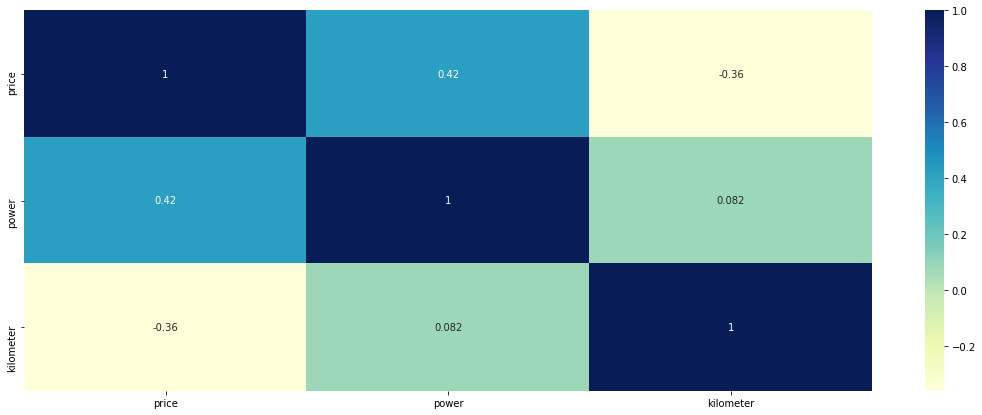

In [29]:
plt.figure(figsize=(19, 7))
df_0_plot = sns.heatmap(df[['price', 'power', 'kilometer']].corr(),
                          cmap="YlGnBu",
                          annot=True)

plt.show()

**Вывод:**

Из корелляции Пирсона можно сделать вывод об отсутсвии сильно-скоррелированных признаков, а так же отметить значительную зависимость между пробегом и ремонтом автомобиля, как и предполагалось ранее. Так же видна логичная весомая зависимость между годом регистрации и стоимостью автомобиля.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        

1. Корреляция  - это мера взаимосвязи двух численных переменных (или ранговых). Поэтому некорректно включать в матрицу корреляций категориальные переменные.
    
2. Коэффициент корреляции Пирсона (который по дефолту рассчитывается в методе corr), имеет определенные требования к данным:
    
- характер взаимосвязи двух переменных должен быть линейным и монотонным (коэффициент корреляции Пирсона не может уловить нелинейные зависимости). Поэтому, чтобы проконтроллировать корректность применения коэффициента корреляции Пирсона стоит сначала построить диаграммы рассеяния для переменных. 
    
- распределения обоих переменных, для которых рассчитывается коэффициент должны быть распределены нормально. То есть стоит построить графики распределений для переменных прежде чем изучать корреляцию. Также выбросы, ассиметрия, бимодальность негативно сказываются на адекватности использования среднего значения в качестве некоторого показателя, характеризующего нашу выборку (а коэффициент коррелиции Пирсона основан на среднем значении). Формулу можно посмотреть здесь:
    
https://studfile.net/preview/2966946/page:34/
    
Чтобы уменьшить негативное влияние выбросов можно перейти от коэффициента корреляции Пирсона к непараметрическому критерию корреляции - коэффициенту корреляции Спирмена, который уходит от реальных значенийи переходит к рангам.
    

Построим матрицу корреляций Спирмена для числовых признаков без учёта объектов-выбросов:

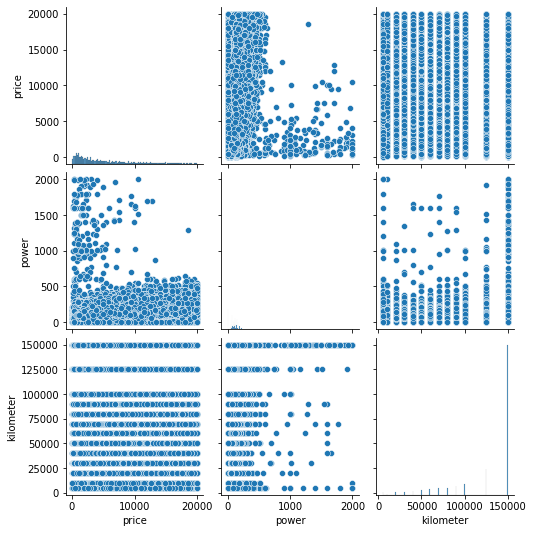

In [30]:
numeric = ['price', 'power', 'kilometer']

sns.pairplot(df[numeric])

In [31]:
df[numeric].corr(method='spearman')

,price,power,kilometer
price,1.000000,0.510347,-0.346629
power,0.510347,1.000000,0.106898
kilometer,-0.346629,0.106898,1.000000


Функция heatmap библиотеки Seaborn предоставляет удобный способ визуализации таких матриц:

<AxesSubplot:>

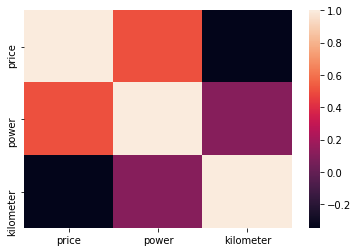

In [32]:
sns.heatmap(df[numeric].corr(method='spearman'))

**Вывод:**

Наибольшая коррцеляция наблюдается между признаками `price` и `power`.

Проведём статистические тесты:

In [33]:
r0 = spearmanr(df['price'], df['power'])
print('Spearman correlation:', r0[0], 'p-value:', r0[1])

Spearman correlation: 0.5103474543949347 p-value: 0.0


In [34]:
r1 = spearmanr(df['price'], df['kilometer'])
print('Spearman correlation:', r1[0], 'p-value:', r1[1])

Spearman correlation: -0.3466294618805373 p-value: 0.0


**Вывод:**

Так как p-value < 0.05 (типичное пороговое значение), то делаем вывод о том, что взаимосвязь (корреляция) между ценой и мощностью/километражем **статистически значима**.

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

1. Исправил, насколько понял. Верно ли что, корреляцию Пирсона можно полностью заменить корреляцие Спирмена? По сути нам все численные признаки нужно будет сравнивать с целевым (price - в нашем случае)?
2. Выше я прочитал, что для корреляции мы не используем категориальные признаки. Но вот, например, модель машины - это категориальный признак. Учитывая его в корреляции, мы, в терории, могли бы увидеть статистическую значимость между ценой и определнной моделью - условно Bentley/Ferrafi. Хм. Или тут как раз суть в том, чтобы уловить статистическую значимость между неочевидными численными признаками?
3. Меня смущает, что p-value везде 0.0 получается.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Да, верно. Это просто выбор коэффициента, по которому мы оцениваем. Они по-разному считаются.
        
Да, есть инструменты, которые учитывают и категориальные признаки.
        
Но вообще, если представить ось x, например, и на ней отложить price и ось y и на ней категории машин, то категории можно расположить, как угодно. Это нарушает логику того что корреляция улавливает как бы законы, если одна переменная увеличивается, то и вторая увеличивается. или наоборот: если первая увеличивается, то вторая уменьшается. Отсюда и требование к линейности связи двух переменных.

<div class="alert alert-info">
<h1> Комментарий студента №3</h1>

Понял. Спасибо, по поводу "p-value везде 0.0 получается" это нормально?
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №3<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
        
Is it possible to have a 0.000 p-value?
Technically, p values cannot equal 0. Some statistical programs do give you p values of . 000 in their output, but this is likely due to automatic rounding off or truncation to a preset number of digits after the decimal point
        
То есть мы можем сделать вывод, что P-value не 0, но близок и поэтому округляется до 0.

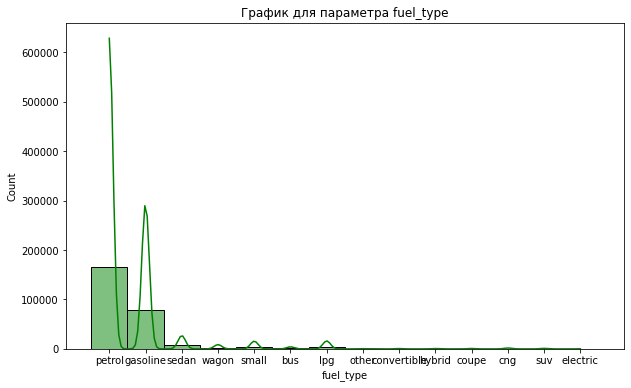

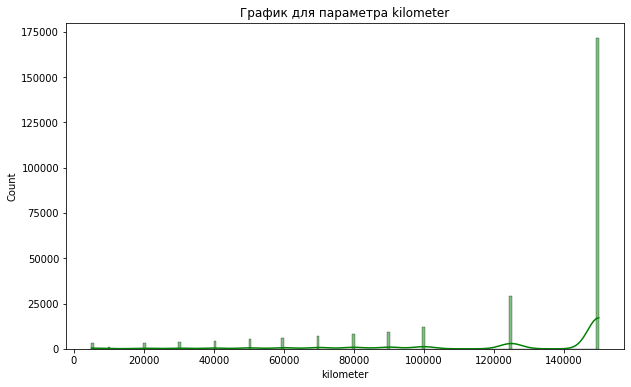

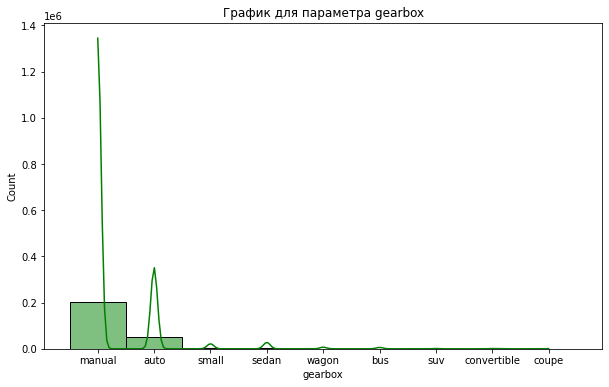

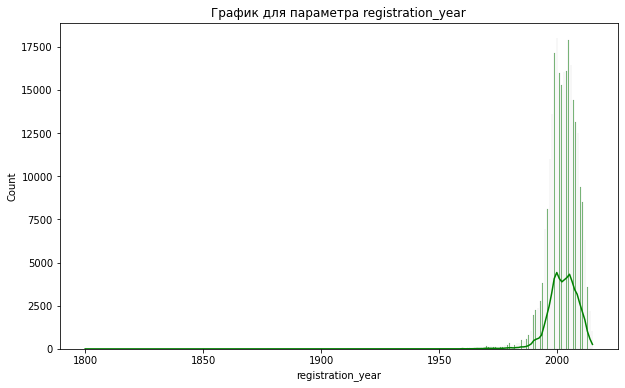

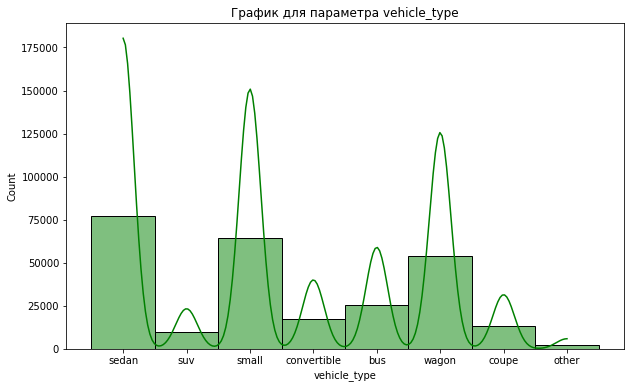

In [35]:
columns = ['fuel_type',
           'kilometer',
           'gearbox',
           'registration_year',
           'vehicle_type']

for name in columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[name],
                 color='green',
                 kde=True)
    plt.title(f'График для параметра {name}')

    plt.show()


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
        
Для категориальных признаков больше подходит по смыслу столбчатая диаграмма, а не гистограмма.
        
В matplotlib она реализована в bar
        
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
        
        
Также можно отобразить распределение Price.

In [36]:
#x = list(df['vehicle_type'])
#y = 
#
#plt.bar(x, y)
#plt.show()

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Что-то запутался. Не могу вспонмить как построить, если х категории, то у нужно их распределение количественное..
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно это сделать через value_counts.
        
в x передать индексы
        
в y сами значения
        

In [37]:
df.nunique()

price                3587
vehicle_type            8
registration_year      87
gearbox                 9
power                 563
model                 250
kilometer              13
fuel_type              14
brand                  39
repaired                3
dtype: int64

**Вывод:**

Проанализиурем распределение данных в нашей выборке:

* в выборке представлены 39 брендов и 250 различных моделей транспорта;
* самый популярный тип двигателя - бензиновый;
* медиана распределения года авто по выборке ~ 2005 год;
* больше всего автомобилей с пробегом 150 тыс. км. **Вероятно, что в данных это была максимальная отметка для автомобиля.** По факту распределение пробега может оказаться другим;
* самая популярная трансмиссия - ручаня коробка передач. По количеству она во много раз превышает автоматическую;
* самый популярный кузов - седан.

In [38]:
df.head(5)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,unknown
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


Категориальные признаки закодируем one-hot encoding:

In [39]:
data_ohe = pd.get_dummies(df, drop_first=True)
data_ohe.head(5)

,price,registration_year,power,kilometer,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_unknown,repaired_yes
0,480,1993,0,150000,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,9800,2004,163,125000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,3600,2008,69,90000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,650,1995,102,150000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В теории тренажера в данный момент предлагается использовать get_dummies, однако, это впоследствии приводит к сложностям поэтому стоит использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. По аналогии с масштабированием делать fit только на трейне, а transform на всех выборках.
<hr>
get_dummies подходит для анализа данных, а для машинного обучения более предпочтителен OHE, т.к. он позоволяет избежать ряд ошибок при обучении моделей, в том числе может работать с неизвестными ранее уровнями категорий, которых не было изначально (например, если появится еще одна модель машины).
        
get_dummies также нельзя использовать вместе с pipeline, column_transformer, ecли появляется новая выборка и ее нужно кодировать, то обязательно стоит выполнить проверку, чтобы получившиеся фичи были такие же.
        
Посмотреть более подробно, как использовать OneHotEncoder можно здесь:

https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing

Разделим выборки на обучающую и тестовую:

In [40]:
target_ohe = data_ohe['price']
features_ohe = data_ohe.drop('price', axis=1)
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe,
                                                                                            target_ohe,
                                                                                            test_size=0.25,
                                                                                            random_state=RANDOM_STATE) 


print(features_train_ohe.shape)
print(features_test_ohe.shape)

(197907, 320)
(65970, 320)


In [41]:
numeric = list(data_ohe)
numeric.remove('price')
print (numeric)

['registration_year', 'power', 'kilometer', 'vehicle_type_convertible', 'vehicle_type_coupe', 'vehicle_type_other', 'vehicle_type_sedan', 'vehicle_type_small', 'vehicle_type_suv', 'vehicle_type_wagon', 'gearbox_bus', 'gearbox_convertible', 'gearbox_coupe', 'gearbox_manual', 'gearbox_sedan', 'gearbox_small', 'gearbox_suv', 'gearbox_wagon', 'model_145', 'model_147', 'model_156', 'model_159', 'model_1_reihe', 'model_1er', 'model_200', 'model_2_reihe', 'model_300c', 'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500', 'model_5_reihe', 'model_5er', 'model_601', 'model_6_reihe', 'model_6er', 'model_7er', 'model_80', 'model_850', 'model_90', 'model_900', 'model_9000', 'model_911', 'model_a1', 'model_a2', 'model_a3', 'model_a4', 'model_a5', 'model_a6', 'model_a8', 'model_a_klasse', 'model_accord', 'model_agila', 'model_alhambra', 'model_almera', 'model_altea', 'model_amarok', 'model_antara', 'model_arosa', 'model_astra', 'model_auris', 'model_avensis', 'model_aveo', 'model_aygo', 'model

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В список численных признаков попадают не только численные признаки.

<div class="alert alert-info">
<h1> Комментарий студента №3</h1>

Речь про кодировку one-hot encoding?
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №3<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
     
Речь о том, что в список численных переменных у тебя попадают закодированные категориальные. Этого можно избежать, если подавать в скейлер только численные признаки ('registration_year', 'power', 'kilometer')        

Масштабируем признаки:

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])
features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что масштабируешь после разделения на выборки.

In [ ]:
features_train_ohe.head()

In [ ]:
data_ohe.info()

**Вывод по разделу:**

В этом разделе мы произвели предобработку данных. Мы перевели названия столбцов в более удобочитаемый нижний и змеиный регистр, удалили неинформативные столбцы, заполнили пропуски, избавились от аномалий, проверили корреляцию Пирсона и сделали визулизацию распределения ключевых признаков. Удалили дубликаты и перевели категориальные значения столбцов в количественные. В итоге у нас образовалась таблица в 263 тыс. строк и 319 столбцов размером 89.8 МВ.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что пишешь промежуточные выводы.

## Обучение моделей

### Модель линейной регрессии:

In [ ]:
'''model = LinearRegression()
model.fit(features_train_ohe, target_train_ohe)

predictions_train_ohe = model.predict(features_train_ohe)

rmse = mean_squared_error(target_train_ohe, predictions_train_ohe)**0.5
print('RMSE:', rmse)

scores = cross_val_score(model,
                         features_train_ohe,
                         target_train_ohe,
                         cv=5)

final_score = sum(scores) / len(scores)
print('Средняя оценка качества модели:', final_score) '''

<div class="alert alert-info">
<h1> Комментарий студента №5</h1>

Исправил.   
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №4<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
 
Пожалуйста, исключи использование тестовой выборки в процессе анализа для всех моделей.

<div class="alert alert-info">
<h1> Комментарий студента №4</h1>

Спасибо за развернутый ответ!    
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №3<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
Кросс-валидацию мы проводим на тренировочной выборке.
    
Тестовая выборка - это иммитация реальных данных, отложенная выборка.
        
Если выбирать модель на тестовой выборке (особенно при подборе гиперпараметров), то получается мы подстраиваем модель под один набор данных (тестовый), и поэтому не можем судить в полной мере об обобщающей способности модели. 
        
Как работает кросс-валидация можно прочитать вот здесь, например:
        
https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b
        
"When conducting a normal train/validation/test split for model training and testing, the model trains on a specific randomly
        
selected portion of the data, validates on a separate set of data, then finally tests on a holdout dataset. In practice this
        
could lead to some issues, especially when the size of the dataset is relatively small, because you could be eliminating a 
        
portion of observations that would be key to training an optimal model. Keeping a percentage of data out of the training phase,
        
even if its 15–25% still holds plenty of information that would otherwise help our model train more effectively.

In comes a solution to our problem — Cross Validation. Cross validation works by splitting our dataset into random groups, 
        
holding one group out as the test, and training the model on the remaining groups. This process is repeated for each group 
        
being held as the test group, then the average of the models is used for the resulting model."
        
Также хорошая статья о кросс-валидации:
        
https://www.mygreatlearning.com/blog/cross-validation/
        
По поводу предназначения выборок можно прочитать здесь:
        

Что такое обучающая, валидационная и тестовая выборки?
        
«Обучающая выборка» — это набор данных, который используется для разработки модели машинного обучения.

«Валидационная выборка» — это набор данных, который используется в процессе разработки модели машинного обучения для подбора 
        
оптимального набора гиперпараметров.

«Тестовая выборка» — это набор данных, который не используется непосредственно в процессе обучения модели или для подбора 
        
гиперпараметров, однако позволяет протестировать модель и является контрольным.
        
Cсылка на статью:
        
https://ai.influenza.spb.ru/faq
        
Тестовая выборка - данные, на которых идет проверка качества работы ранее обученной модели.

<div class="alert alert-info">
<h1> Комментарий студента №3</h1>

Решил проверку попробовать через кросс-валидации сделать.

Я не до конца понял, как нам валидационная выборка помогает в определении качества модели. Вот есть у нас 3 выборки. Трейн, валид и тест. Обучил на трейне, проверил на валид. А тест зачем тогда, если есть валид - суть же одна.    
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Качество на тренировочной выборке непоказательно, по нему мы не можем судить об обобщающей способности модели.
    
Есть 2 варинта работы:
    
1. Либо разделить данные на 3 выборки (трейн, валидация и тест) и в процессе анализа качество проверять на валидационной выборке. В этом случае время на предикт также измеряем на валидационной выборке.
    
2. Либо разделять на 2 выборки (трейн и тест), и тогдакачество мы смотрим на кросс-валидации, которая проводится на тренировочной выборке. А время на предикт измеряем на тренировочной также.
    
В обоих случаях тестовая выборка - контрольная. Нужна чтобы проконтролировать качество выбранной лучшей модели на отложенных данных.
    


<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Точно)
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Когда есть только 2 выборки: тренировочная и тестовая (отложенная), то качество мы смотрим в процессе анализа на кросс-валидации, а тестовая выборка нужна только для контроля качества лучшей модели.
    
Либо надо выделять еще валидационную выборку и проверять на ней.

**Вывод:**


Значения RMSE высоки и не вписываются в лимит задачи.

### Модель решающего дерева:

Закодируем признаки с помощью порядкового кодирования, которая предпочтительнее для моделей решающего дерева:

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что используешь порядковое кодирование для моделей на основе деревьев решений.

Разделим выборки на обучающую и тестовую:

In [ ]:
target_oe = df['price']
features_oe = df.drop('price', axis=1)
features_train_oe, features_test_oe, target_train_oe, target_test_oe = train_test_split(features_oe,
                                                                                        target_oe,
                                                                                        test_size=0.25,
                                                                                        random_state=RANDOM_STATE) 


print(features_train_oe.shape)
print(features_test_oe.shape)

In [ ]:
features_oe.head(5)

In [ ]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(features_train_oe[['vehicle_type','registration_year', 'gearbox', 'power', 
            'model', 'kilometer','fuel_type',
            'brand', 'repaired']])

features_train_oe[['vehicle_type','registration_year', 'gearbox', 'power', 
            'model', 'kilometer','fuel_type',
            'brand', 'repaired']] = enc.transform(features_train_oe[['vehicle_type','registration_year', 'gearbox', 'power', 
            'model', 'kilometer','fuel_type',
            'brand', 'repaired']])

features_test_oe[['vehicle_type','registration_year', 'gearbox', 'power', 
            'model', 'kilometer','fuel_type',
            'brand', 'repaired']] = enc.transform(features_test_oe[['vehicle_type','registration_year', 'gearbox', 'power', 
            'model', 'kilometer','fuel_type',
            'brand', 'repaired']])

In [ ]:
features_train_oe.head(5)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Роман, обрати, пожалуйста, внимание:
    
если ты проводишь кодирование с помощью кодировщиков типа OrdinalEncoder и OneHotEncoder, то стоит это делать после разделения на выборки. То есть по аналогии со StandardScaler: обучаем кодер только на тренировочной выборки, а  трансформируем все 3 с помощью него.
    
Это нам помогает иммитировать работу с реальными данными. В тренировочной выборке могут оказаться не все категории, которые есть в валидации или в трейне у некоторых фичей, поэтому если не настроить кодер на обработку незнакомых категорий, код будет выдавать ошибку.
    
За обработку незнакомых категорий в OrdinalEncoder отвечают параметры handle_unknown и unknown_value.
    
С применением можно ознакомиться в документации:
    
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Постарался исправить и настроить замену, но кроме как на 1 не понял на что ещё в данном случае заменить можно.., но RMSE куда-то в космос улетает. Посмотри пожалуйста
</div>

Построим модель для решающего дерева и найдем наилучшие гиперпараметры.

In [ ]:
'''for depth in range(3, 20, 3):
    model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth = depth)
    model.fit(features_train_oe, target_train_oe)
    predictions_train_oe = model.predict(features_train_oe)
    rmse = mean_squared_error(target_train_oe, predictions_train_oe)**0.5
    print('Глубина:', depth)
    print('RMSE для решающего дерева:', rmse)
    print('')
print()

scores = cross_val_score(model,
                         features_train_oe,
                         target_train_oe,
                         cv=5)

final_score = sum(scores) / len(scores)
print('Средняя оценка качества модели:', final_score)'''

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №4<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь также есть использование тестовой выборки.
    
Ее стоит использовать только для тестирования лучшей модели.

<div class="alert alert-info">
<h1> Комментарий студента №5</h1>

Исправил.   
</div>

**Вывод:**


Модель склонна к переобучению. Стоит ограничить глубину дерева до 9.

### Модель случайного леса:

In [ ]:
'''%%time
for est in [100, 500]:
    model = RandomForestRegressor(random_state=RANDOM_STATE, 
                                   n_estimators=est, 
                                   max_depth=9)
    model.fit(features_train_oe, target_train_oe)
    predictions_train_oe = model.predict(features_train_oe)
    rmse = mean_squared_error(target_train_oe, predictions_train_oe)**0.5
    print('Количество деревьев:', est)
    print('RMSE для случайного леса:', rmse)
    print('')
print()

scores = cross_val_score(model,
                         features_train_oe,
                         target_train_oe,
                         cv=5)

final_score = sum(scores) / len(scores)
print('Средняя оценка качества модели:', final_score)'''

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №4<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь также вычисляется rmse на тестовой выборке.

<div class="alert alert-info">
<h1> Комментарий студента №5</h1>

Исправил.   
</div>

**Вывод:**


Разница в установленных значения количества деревьев оказало незначительное вленияие на RMSE.

### LightGBM

Проверим версию:

In [ ]:
import lightgbm
print(lightgbm.__version__)

In [ ]:
target = df['price']
features = df.drop('price', axis=1)


for c in features.columns:
  col_type = features[c].dtype
  if col_type == 'object':
    features[c] = features[c].astype('category')


features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=RANDOM_STATE) 


print(features_train.shape)
print(features_test.shape)

In [ ]:
#категориальные признаки для OHE
#ohe_features_ridge = features_train.select_dtypes(include='object').columns.to_list()
#print(ohe_features_ridge)

In [ ]:
#численные признаки
#num_features = features_train.select_dtypes(exclude='object').columns.to_list()
#num_features

In [ ]:
#X_train_light = features_train.copy()
#X_test_light = features_test.copy()

In [ ]:
#col_transformer_light = make_column_transformer(
#    (
#        OneHotEncoder(drop='first', handle_unknown='ignore'),
#        ohe_features_ridge
#    ),
#    (
#        StandardScaler(), 
#        num_features
#    ),
#    remainder='passthrough',
#    verbose_feature_names_out=False
#)
#
#X_train_light = pd.DataFrame.sparse.from_spmatrix(
#    col_transformer_light.fit_transform(X_train_light),
#    columns=col_transformer_light.get_feature_names_out()
#)
#
#X_train_light.head()

In [ ]:
## трансформируем тестовую выборку
#X_test_light = pd.DataFrame.sparse.from_spmatrix(
#    col_transformer_light.transform(X_test_light),
#    columns=col_transformer_light.get_feature_names_out()
#)
#
## смотрим на результат
#X_test_light.head()

Построим модель без подбора гиперпараметров:

In [ ]:
model = lgb.LGBMRegressor(random_state=RANDOM_STATE)
model.fit(features_train, target_train)
predictions_train_light = model.predict(features_train)
rmse = mean_squared_error(target_train, predictions_train_light)**0.5
print('LightGBM RMSE:', rmse)

scores = cross_val_score(model,
                         features_train,
                         target_train,
                         cv=5)

final_score = sum(scores) / len(scores)
print('Средняя оценка качества модели:', final_score)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №4<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь также используется тестовая выборка для вычисления rmse.
    
Также стоит определиться, какой способ кодирования используется для LightGBM. На кросс-валидации не используются выборки, которые ты готовишь для внутреннего алгоритма кодирования LightGBM.

<div class="alert alert-info">
<h1> Комментарий студента №5</h1>

1. Исправил.
2. Добавил кодирование по примеру из твоей ссылки. Второе предложение не очень понял)
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №5<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Ты все верно обработал ( я имею в виду масштабирование и кодирование), но вот только до этого исправления выбор метода кодирования категориальных признаков был более правильный для LightGBM.
    
Суть в том, что в данном проекте мы подбираем более подходящие методы кодирования категориальных переменных для разных моделей. То есть готовим разные выборки для разных моделей (если они используют отличающиеся методы кодирования).
    
Например:
    
1. Для линейной регресии импользуем one-hot кодирование категориальных переменных (OneHotEncoder  или get_dummies). И также масштабирование численных признаков.
    
2. Для моделей на основе деревьев решений подходит порядковое кодирование (OrdinalEncoder), но one-hot encoding также допускается.
    
3. У бустингов LightGBM и CatBoost есть свои внутренние алгоритмы кодирования категориальных переменных (у каждого свой). У тебя в этом плане все было сделано правильно, когда ты меняешь тип на category у категориальных фичей, то LightGBM понимает, какие фичи ему стоит закодировать самостоятельно.
    
Прочитать про это можно здесь:
    
https://www.kaggle.com/getting-started/203471
    
Пример:

https://www.kaggle.com/code/mlisovyi/beware-of-categorical-features-in-lgbm
    
Также можно использовать порядковое кодирование для бустингов. One-hot кодирование в данном проекте мы не используем с LightGBM.
    


<div class="alert alert-info">
<h1> Комментарий студента №6</h1>

Твое сообщение выше: "1.Также стоит определиться, какой способ кодирования используется для LightGBM. 2.На кросс-валидации не используются выборки, которые ты готовишь для внутреннего алгоритма кодирования LightGBM."
    
1. Мы использовали способ кодирования в виде изменения типа на category у категориальных фичей
2. Не очень понял, у нас не используются (а надо) или в целом не используются. Если в целом, то какие тогда используются? Нам надо было копии выборок сделать до кодирования и их в валидации использовать, если да, то надо было их скалировать и кодировать?

П.С. можешь пожалуйста разжевать все и то что где исправить, у меня дедлайн горит уже сильно, надо скорее сдавать проект уже...)
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №6<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Роман, сейчас все верно. Ты используешь и на кросс-валидации и для тестирования выборки с category.
    
Мое сообщение относилось вот к такому коду (срин ниже), если обратишь внимание: для кросс-валидации ты использовал порядковое кодирование LightGBM, а тестировал в итоге на выборке с category. То есть было расхождение.
    
    


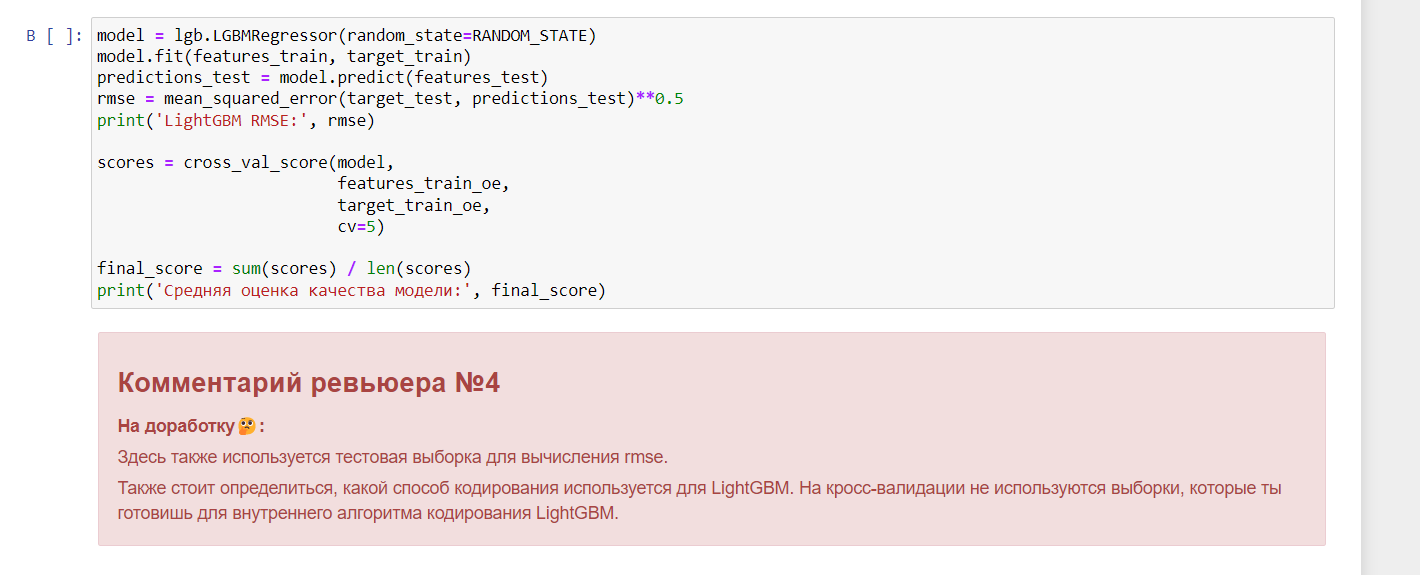

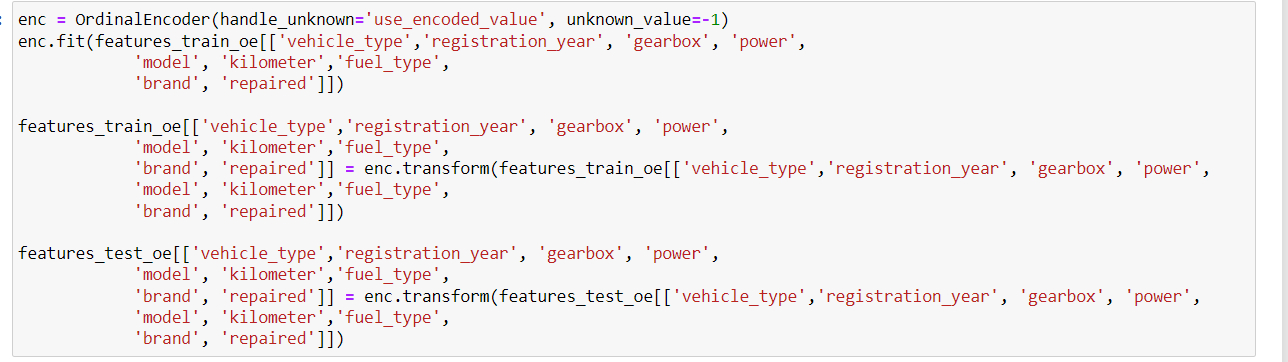

**Вывод:**

У LightGBM самая высокая средняя оценка качества модели: 0.86.

Найдем наилучшие гиперпараметры для LightGBM:

In [ ]:
param_grid = {'n_estimators': [100, 200, 500],
              'num_leaves': [n for n in range(0, 200, 20)]}

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что подбираешь гиперпараметры. И хорошо, что используешь внутренний алгоритм кодирования для LightGBM.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Хотя бы для 1 одной модели стоит добавить подбор еще одного гиперпараметра (чтобы было 2).
    

<div class="alert alert-info">
<h1> Комментарий студента №2</h1>

Добавил
</div>

<div class="alert alert-info">
<h1> Комментарий студента</h1>

Сначала я решил взять 3 разных варината количества деревьев, 100, 500 и 1000. Но компеляция происходила чрезмерно долго (по 20 минут одну строчку) и я решил оставноиться на среднем варианте.
    
UPD комм.№2: после запуска на локальной машине все быстро заработало.
</div>

In [ ]:
model = lgb.LGBMRegressor(random_state=RANDOM_STATE)

tuning_model=GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=3,
                          verbose=3)

tuning_model.fit(features_train, target_train)
display(tuning_model.best_params_)
display(tuning_model.best_score_*-1)

<div class="alert alert-info">
<h1> Комментарий студента</h1>

Один раз скомпелировалось, после чего юпитер заглючил и проишлось все снова компелировать, и уже у меня не хватило терпения, поэтому не стал повторно это делать, а записал лучший результат
</div>

**Вывод:**


Мы обучили разные модели, подобрали гиперпараметры для них и обнаружили, что модель LightGBM с гиперпараметрами 'n_estimators': 200, 'num_leaves': 180 дает наименьшее значение RMSE: 1567.25

**Выводы по разделу:**

Мы обучили 4 модели и посмотрели их RMSE:

Итоги:

* Линеная регрессия - RMSE: 2702.06
* Решающее дерево RMSE: 2143.24
* Случайны лес RMSE: 2050.46
* LightGBM RMSE: 1567.25

## Анализ моделей

### Модель линейной регрессии

Найдем время обучения модели линейной регрессии:

In [ ]:
%%time

model = LinearRegression()
model.fit(features_train_ohe, target_train_ohe)

In [ ]:
%%time

predictions_train_ohe = model.predict(features_train_ohe)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №4<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь также используется тестовая выборка для измерения времени на predict, стоит заменить на тренировочную.

<div class="alert alert-info">
<h1> Комментарий студента №5</h1>

Исправил.   
</div>

### Модель решающего дерева

Найдем время обучения модели решающего дерева:

In [ ]:
%%time

model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=9)
model.fit(features_train_oe, target_train_oe)

In [ ]:
%%time

predictions_train_oe = model.predict(features_train_oe)

### Модель случайного леса

Обучим модель случайного леса:

In [ ]:
%%time

model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=9, n_estimators=1000)
model.fit(features_train_oe, target_train_oe)

In [ ]:
%%time

predictions_train_oe = model.predict(features_train_oe)

### Модель LightGBM

Найдем время обучения LightGBM:

In [ ]:
%%time
model = lgb.LGBMRegressor(random_state=RANDOM_STATE,
                          n_estimators=200,
                          num_leaves=180)
model.fit(features_train, target_train)

In [ ]:
%%time

predictions_train = model.predict(features_train)

In [ ]:
predictions_test = model.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test)**0.5
print('RMSE', rmse)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что измеряешь время на fit и на predict отдельно для каждой модели.
    
Молодец, что проверяешь на тестовой выборке только лучшую модель.
    

Посмотрим на самые значимые признаки:

In [ ]:
lgb.plot_importance(model, height=.5)

In [ ]:
x_ax = range(len(target_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, target_test, label="original")
plt.plot(x_ax, predictions_test, label="predicted")
plt.title("Определение стоимости автомобилей: тестовые и предсказанные данные")
plt.xlabel('features')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

**Общий вывод по разделу:**


Дольше всего учится модель случайного леса: 3 мин 22 сек. Модель LightGBM имеет приемлемую скорость обучения и предсказания 12.4 сек и при этом самую низкую RMSE из всех моделей: на тестовой выборке результат 1567.25

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что оцениваешь важность признаков для модели.

## Общий вывод

На входе мы получили таблицу с более чем 264 тыс. строк и 321 столбцов размером 89 МВ. Мы перевели названия столбцов в более читаемый нижний и змеиный регистр, удалили неинформативные столбцы, заполнили пропуски и предложили варианты их заполнения, избавились от аномалий, удалили дубликаты.

Для модели линейной регрессии перевели категориальные значения столбцов в количественные. Для моделей решающего дерева и случайного леса применили порядковое кодирование, в итоге подбор гиперпараметров стал быстрее. Мы обучили 4 разные модели, подобрали гиперпараметры для них и обнаружили, что модель LightGBM с гиперпараметрами 'n_estimators': 200, 'num_leaves': 180 дает наименьшее значение rmse: 1567.25

Мы проанализировали 4 модели и обнаружили, что дольше всего учится модель случайного леса: 2 мин 24 сек. Модель LightGBM имеет приемлемую скорость обучения и предсказания 12.4 сек и при этом самую низкую RMSE из всех моделей: на тестовой выборке результат 1567.25

**Итог:**

Исходя из требований заказчика мы рекомендуем модель LightGBM, которая показала лучшие результаты по всем параметрам.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь я оставлю несколько интересных и полезных ссылок по теме:
        
        
1. "XGBoost, LightGBM or CatBoost — which boosting algorithm should I use?"

https://medium.com/riskified-technology/xgboost-lightgbm-or-catboost-which-boosting-algorithm-should-i-use-e7fda7bb36bc
        
        
2. "Transforming categorical features to numerical features"
        
https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic
        
        
3. "Градиентный Бустинг: самый частый вопрос на собеседовании на дата саентиста"
        
https://www.youtube.com/watch?v=ZNJ3lKyI-EY
        
4. "Tutorial: CatBoost Overview"
        
https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook
        
5. "Gradient Boosting from scratch"
        
https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Роман, спасибо за работу! Проект отличный, продуманный, структурно выдержанный и аккуратный. Видно, что ты вдумчиво подходишь к работе. Однако стоит внести некоторые исправления, чтобы можно было считать проект завершенным.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть:**

1. Удалены все лишние признаки и константный признак
2. Есть промежуточные выводы по ходу анализа признаков
3. Есть обработка некорректных и пропущенных значений
4. Кодирование категориальных признаков осуществляется.
5. Есть анализ времени предсказания и обучения моделей, а также их качества
6. Предложена модель с учетом времени обучения и предсказания, а также качества работы
7. Аккуратность кода на высоком уровне.
8. Масштабирование численных призаков осуществляется 
9. Использованы разные методы кодирования категориальных переменных.
    
**Замечания, на которые стоит обратить внимание при будущей работе:**
    
    1. Кодировать с помощью OrdinalEncoder после разделения на выборки
    2. Модели выбирать по результатам кросс-валидации (если есть только трейн и тест)
    3. Придумать способ заполнения пропусков
    4. Обработать аномалии в Price
    5. Пересмотреть верхнюю границу года регистрации.
    6. Добавить подбор еще одного параметра хотя бы еще для одной модели.

    
    
Остальные комментарии ты найдешь выше.

**Желаю удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №2</b>

Роман, спасибо за работу! 
    
Что осталось поправить:
    
    1. Если есть только 2 выборки (трейн и тест), то качество в процессе анализа стоит смотреть на кросс-валидации. Либо дополнительно выделить валидационную (третью выборку)
    
**Жду твой проект на следующее ревью**
    

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №3</b>

Роман, спасибо за работу! 
    
Кросс-валидация проводится на тренировочной выборке.
    
Тестовая выборка нужна для контроля качества лучшей модели.
    
**Жду твой проект на следующее ревью**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №4</b>

Роман, спасибо за работу! 
    
Пожалуйста, исключи использование тестовой выборки вплоть до момента тестирования лучшей модели (которое у тебя проведено корректно). Выше я указала места, где стоит это сделать.
    
Также для LightGBM стоит определиться с методом кодирования. Правильнее для тестирования использовать тот метод кодирования, который ты используешь для кросс-валидации (потому что выбор ты делаешь именно исходя из этого результата).
    
**Жду твой проект на следующее ревью**
    


<div class="alert alert-info">
<h1> Комментарий студента №6</h1>

Спасибо за проверку! Я все перепроверил несколько раз, но я ещё в прошлое ревью исключил везде тестовую выборку при аналезе моделей. Она у меня используется только для тестирования лучшей модели. Если нет, можно пожалуйста указать место, а то не могу найти ошибку свою, к сожалению. 
    
    
С методом кодирования определился. Во время финального тестирования я использую тестовую выборку, которая была так же закодирована как обучающая, не понимаю, что не так. Для кросс-валидации я использую обучающую выборку, которая тем же методом закодирвана. Кажется, все исправил, либо я просто не понимаю о чем речь...
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №6</b>
    
Роман, спасибо за работу!
    
Прости, в прошлый раз я не оставила вывод, поспешила, поэтому этот вывод относится к позапрошлой итерации. То что ты все сделал еще в прошлый раз, я все видела. Но также поменял метод кодирования для LightGBM, так что в прошлый раз вопрос был только к этому.
    
Какое расхождение у выборок было на 4 итерации, я приложила скрины, надеюсь, немного распутается клубок из итераций и станет яснее)
    
Конечно, работу принимаю, сейчас уже все отлично, ты молодец.
    
**Проект принимаю и желаю успехов в дальнейшем!**